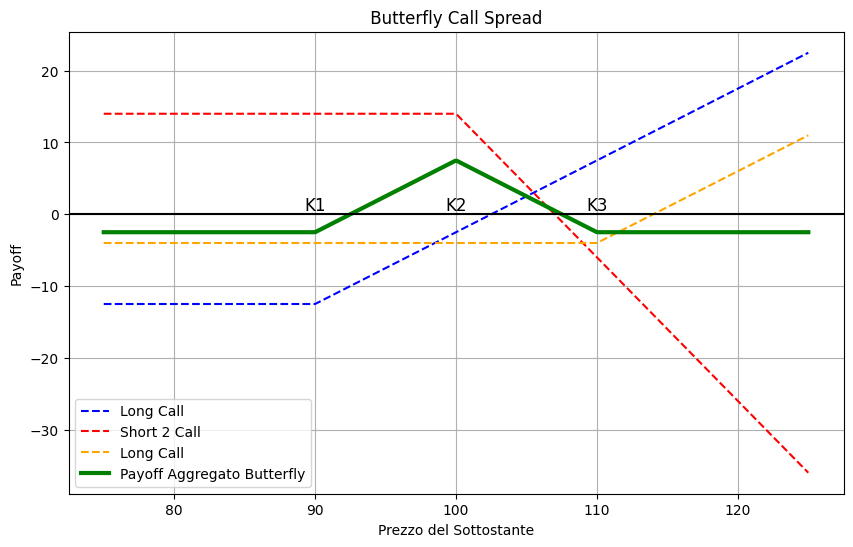

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri della strategia Butterfly Call Spread
K1 = 90    # Strike della call long inferiore
K2 = 100   # Strike della call short (venduta, quantità 2)
K3 = 110   # Strike della call long superiore

# Prezzi (premiums) ipotizzati per le opzioni, basati su un asset con prezzo corrente pari a 100
price_call_K1 = 12.5   # Prezzo della call a strike K1 (long)
price_call_K2 = 7.0    # Prezzo della call a strike K2 (short)
price_call_K3 = 4.0    # Prezzo della call a strike K3 (long)

# Intervallo dei possibili prezzi del sottostante
S = np.linspace(75, 125, 500)

# Calcolo dei payoff netti per ogni leg includendo il costo/premio pagato o incassato

# Long call @K1: payoff = max(S - K1, 0) - price_call_K1
net_payoff_long_call_K1 = np.maximum(S - K1, 0) - price_call_K1

# Short call @K2 (quantità 2): per una short call il payoff netto è: premium - max(S - K2, 0)
# Per due posizioni: 2 * (price_call_K2 - max(S - K2, 0))
net_payoff_short_call_K2 = 2 * price_call_K2 - 2 * np.maximum(S - K2, 0)

# Long call @K3: payoff = max(S - K3, 0) - price_call_K3
net_payoff_long_call_K3 = np.maximum(S - K3, 0) - price_call_K3

# Payoff aggregato della Butterfly Call Spread (net payoff totale)
aggregated_net_payoff = net_payoff_long_call_K1 + net_payoff_short_call_K2 + net_payoff_long_call_K3

# Creazione del grafico
plt.figure(figsize=(10, 6))

# Tracciamo i payoff netti delle singole opzioni
plt.plot(S, net_payoff_long_call_K1, label='Long Call'.format(price_call_K1), linestyle='--', color='blue')
plt.plot(S, net_payoff_short_call_K2, label='Short 2 Call'.format(price_call_K2), linestyle='--', color='red')
plt.plot(S, net_payoff_long_call_K3, label='Long Call'.format(price_call_K3), linestyle='--', color='orange')

# Tracciamo il payoff aggregato in verde
plt.plot(S, aggregated_net_payoff, label='Payoff Aggregato Butterfly', color='green', linewidth=3)

# Linea orizzontale a Y=0 per evidenziare il break-even
plt.axhline(0, color='black', linewidth=1.5)

# Aggiungiamo le etichette degli strike sul grafico alle coordinate (strike, 0)
plt.text(K1, 0, 'K1', fontsize=12, ha='center', va='bottom')
plt.text(K2, 0, 'K2', fontsize=12, ha='center', va='bottom')
plt.text(K3, 0, 'K3', fontsize=12, ha='center', va='bottom')

# Etichette degli assi e titolo
plt.xlabel('Prezzo del Sottostante')
plt.ylabel('Payoff')
plt.title(' Butterfly Call Spread ')
plt.legend()
plt.grid(True)
plt.show()


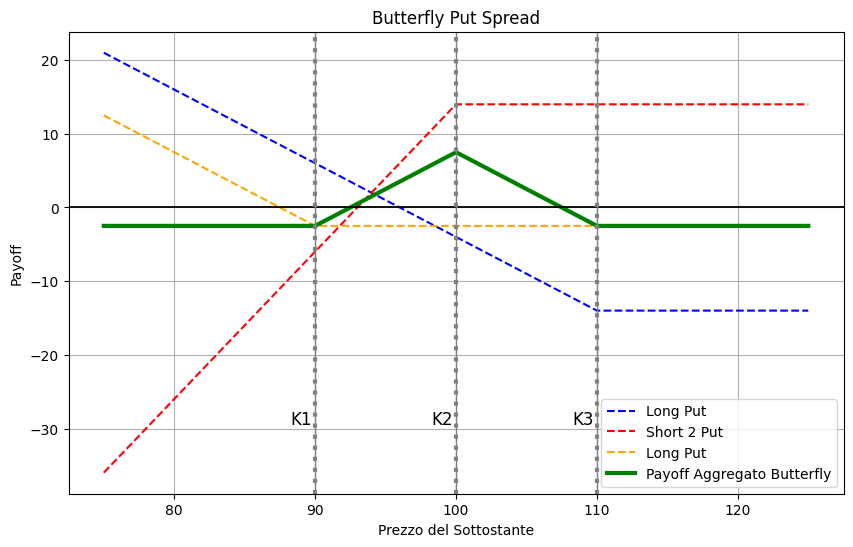

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Strike dei puts (da utilizzare in ordine decrescente per la struttura put butterfly)
K1 = 90    # Strike basso (long put)
K2 = 100   # Strike centrale (short put, quantità 2)
K3 = 110   # Strike alto (long put)

# Prezzi ipotizzati delle opzioni put, calcolati secondo put-call parity (con tasso 0)
# Call butterfly aveva: call @90 = 12.5, call @100 = 7.0, call @110 = 3.0
# Pertanto, con S = 100, si ha:
# Put(K) = Call(K) - (S - K)
price_put_K1 = 12.5 - (100 - K1)  # 12.5 - 10 = 2.5
price_put_K2 = 7.0 - (100 - K2)   # 7.0  - 0  = 7.0
price_put_K3 = 4.0 - (100 - K3)   # 3.0  + 10 = 13.0

# Intervallo dei possibili prezzi del sottostante
S = np.linspace(75, 125, 500)

# Calcolo dei payoff netti per ogni leg (con le puts)
# Long put @K3 (strike 110): payoff = max(110 - S, 0) - price_put_K3
net_payoff_long_put_K3 = np.maximum(K3 - S, 0) - price_put_K3

# Short put @K2 (strike 100, quantità 2): payoff = 2 * (price_put_K2 - max(100 - S, 0))
net_payoff_short_put_K2 = 2 * (price_put_K2 - np.maximum(K2 - S, 0))

# Long put @K1 (strike 90): payoff = max(90 - S, 0) - price_put_K1
net_payoff_long_put_K1 = np.maximum(K1 - S, 0) - price_put_K1

# Payoff aggregato della Put Butterfly Spread
aggregated_net_payoff = net_payoff_long_put_K3 + net_payoff_short_put_K2 + net_payoff_long_put_K1

# Creazione del grafico
plt.figure(figsize=(10, 6))

# Tracciamo i payoff netti delle singole opzioni
plt.plot(S, net_payoff_long_put_K3, label='Long Put'.format(price_put_K3), linestyle='--', color='blue')
plt.plot(S, net_payoff_short_put_K2, label='Short 2 Put'.format(price_put_K2), linestyle='--', color='red')
plt.plot(S, net_payoff_long_put_K1, label='Long Put', linestyle='--', color='orange')

# Tracciamo il payoff aggregato in verde
plt.plot(S, aggregated_net_payoff, label='Payoff Aggregato Butterfly', color='green', linewidth=3)

# Linea orizzontale a Y=0 per evidenziare il break-even
plt.axhline(0, color='black',  linewidth=1.3)

# Aggiungiamo le etichette degli strike sul grafico alle coordinate (strike, 0)
plt.text(K1-1, -30, 'K1', fontsize=12, ha='center', va='bottom')
plt.text(K2-1, -30, 'K2', fontsize=12, ha='center', va='bottom')
plt.text(K3-1, -30, 'K3', fontsize=12, ha='center', va='bottom')

plt.axvline(K1, color='grey', linestyle=':', linewidth=3)
plt.axvline(K2, color='grey', linestyle=':', linewidth=3)
plt.axvline(K3, color='grey', linestyle=':', linewidth=3)

plt.axvline(K1, color='grey', linestyle='-', linewidth=1)
plt.axvline(K2, color='grey', linestyle='-', linewidth=1)
plt.axvline(K3, color='grey', linestyle='-', linewidth=1)


# Etichette degli assi e titolo
plt.xlabel('Prezzo del Sottostante')
plt.ylabel('Payoff')
plt.title('Butterfly Put Spread')
plt.legend()
plt.grid(True)
plt.show()


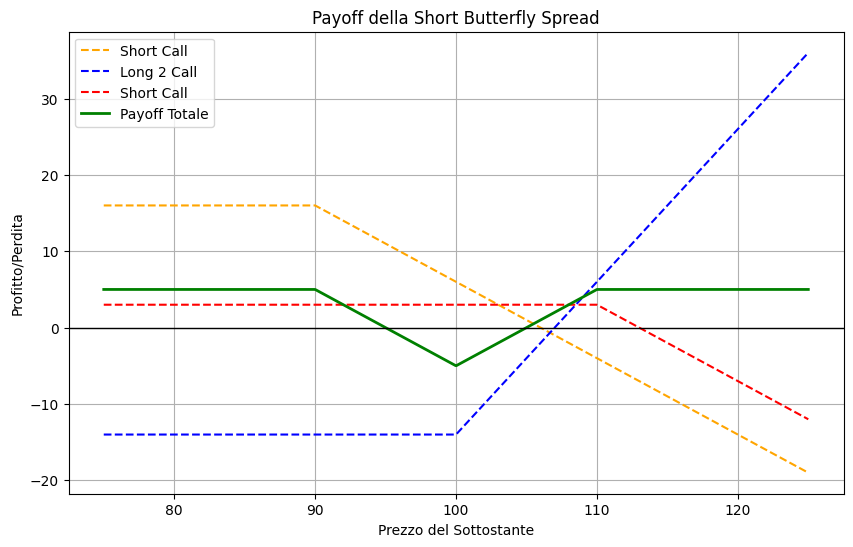

Net Credit della strategia: 5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Prezzo del sottostante di riferimento
S0 = 100

# Strike scelti
K1 = 90   # Strike della short call
K2 = 100  # Strike delle 2 long call
K3 = 110  # Strike della short call

# Premi di riferimento (valori "di mercato")
premium_K1 = 16  # Premio della call a strike 80
premium_K2 = 7  # Premio della call a strike 100
premium_K3 = 3   # Premio della call a strike 120

# Generazione dell'intervallo dei prezzi del sottostante
S = np.linspace(75, 125, 1000)

# Funzione payoff per una call
def call_payoff(S, K):
    return np.maximum(S - K, 0)

# Calcolo dei payoff per ciascuna posizione (includendo i premi)
payoff_short_K1 = premium_K1 - call_payoff(S, K1)      # Short call a K1
payoff_long_K2  = 2 * (call_payoff(S, K2) - premium_K2)  # Long 2 call a K2
payoff_short_K3 = premium_K3 - call_payoff(S, K3)        # Short call a K3

# Calcolo del payoff totale aggregato
total_payoff = payoff_short_K1 + payoff_long_K2 + payoff_short_K3

# Plot dei payoff individuali e del payoff totale
plt.figure(figsize=(10,6))
plt.plot(S, payoff_short_K1, label=f'Short Call', linestyle='--', color='orange' )
plt.plot(S, payoff_long_K2,  label=f'Long 2 Call', linestyle='--', color='blue')
plt.plot(S, payoff_short_K3, label=f'Short Call', linestyle='--',color='red')
plt.plot(S, total_payoff,    label='Payoff Totale', linewidth=2, color='green')

plt.axhline(0, color='black', lw=1)

plt.xlabel('Prezzo del Sottostante')
plt.ylabel('Profitto/Perdita')
plt.title('Payoff della Short Butterfly Spread')
plt.legend()
plt.grid(True)
plt.show()

# Calcolo e stampa del Net Credit iniziale
net_credit = premium_K1 + premium_K3 - 2 * premium_K2
print(f"Net Credit della strategia: {net_credit}")




